# SavorySights - Unsupervised ML

### Introduction
<p>New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.</p>
 <p>New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.</p> 
    <p>The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies.
    Over last decades it is continuously grow because of the city’s important role in government and commercial business.
    
</p>
With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc.

So as part of this project , we will list and visualise all major parts of New Delhi City .
   </p>

 ### Questions that can be asked using the above mentioned datasets
- What is best location in New Delhi City for Chinese Cuisine ? 
- Which areas have large number of Chinese Resturant Market ? 
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer Chinese Cuisine ?
- What places are have best restaurant in New Delhi?

### Data
For this project we need the following data :
<ul>
<li> New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
     </ul>
<li> Nearby places in each locality of new delhi city.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the new delhi city data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from pandas import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


## Read the zomato resturant data from csv file

In [2]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

## Data Cleaning
#### remove the unwanted columns and rows from dataset

In [5]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [6]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [7]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### created map to show the restaurant cluters 

In [8]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [9]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        4  
2        4  
3        4  
4        4  
5        4

## What places are have best restaurant in New Delhi?

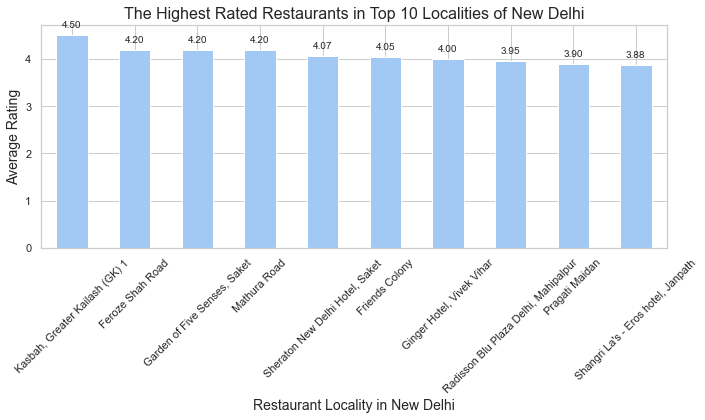

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
custom_palette = sns.color_palette("pastel")  # You can choose a different palette name or customize colors

# Set Seaborn style with the custom palette
sns.set(style="whitegrid", palette=custom_palette)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar', ax=ax)

# Title and labels
ax.set_title('The Highest Rated Restaurants in Top 10 Localities of New Delhi', fontsize=16)
ax.set_xlabel('Restaurant Locality in New Delhi', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


The best restarants are available in <b>Kesbah, Greater Kailash area.</b>

## what places are have worst restaurants in New Delhi?

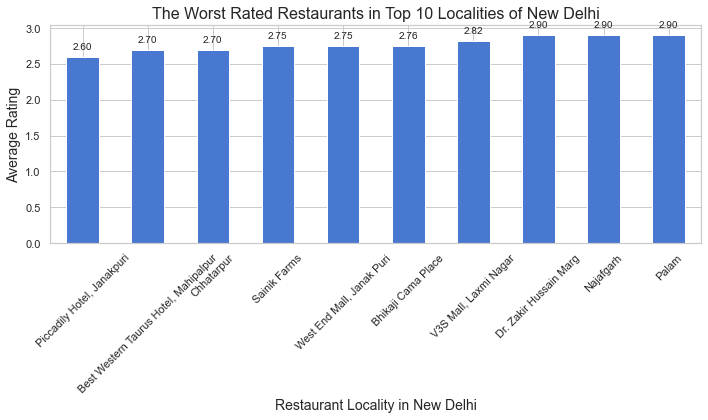

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
custom_palette = sns.color_palette("muted")  # You can choose a different palette name or customize colors

# Set Seaborn style with the custom palette
sns.set(style="whitegrid", palette=custom_palette)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart
df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar', ax=ax)

# Title and labels
ax.set_title('The Worst Rated Restaurants in Top 10 Localities of New Delhi', fontsize=16)
ax.set_xlabel('Restaurant Locality in New Delhi', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


The worst restarants are available in <b>Piccadily Hotel, Janakpuri.</b>

## Which place are suitable for edible person in New Delhi city?

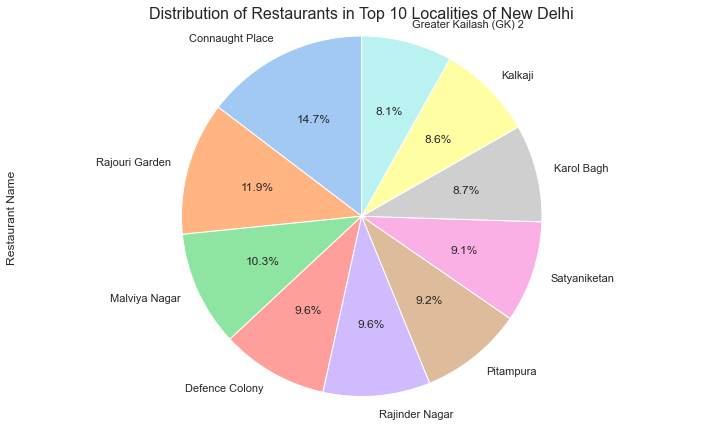

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Data for the pie chart
data = df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10)

# Plotting the pie chart
data.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax, colors=sns.color_palette("pastel"))

# Title
ax.set_title('Distribution of Restaurants in Top 10 Localities of New Delhi', fontsize=16)

# Equal aspect ratio ensures that the pie chart is circular
ax.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()


<b>Connaught Place</b> is the best places for edible person to stay there.

## What are the best places for chinese restaurant in New Delhi city

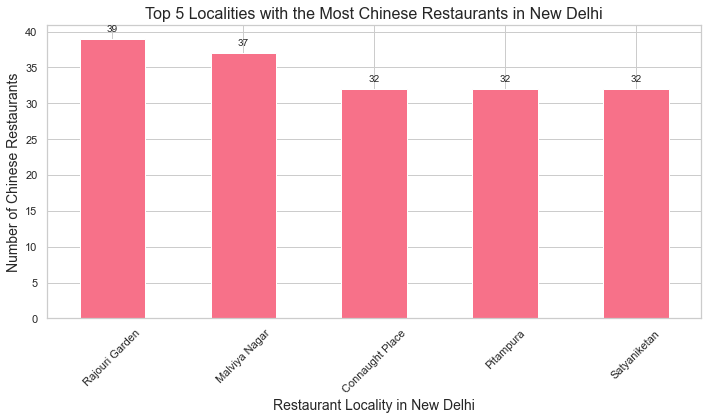

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a unique custom color palette
custom_palette = sns.color_palette("husl")  # You can choose a different palette name or customize colors

# Set Seaborn style with the custom palette
sns.set(style="whitegrid", palette=custom_palette)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Data for the bar plot
data = df_Res[df_Res['Cuisines'].str.contains('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5)

# Plotting the bar chart
data.plot(kind='bar', ax=ax)

# Title and labels
ax.set_title('Top 5 Localities with the Most Chinese Restaurants in New Delhi', fontsize=16)
ax.set_xlabel('Restaurant Locality in New Delhi', fontsize=14)
ax.set_ylabel('Number of Chinese Restaurants', fontsize=14)

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


<b>Chanakyapuri</b> is the best place for Chinese restaurant.

### Data transformation
Based on Locality grouping the data

In [19]:
df_Res

Restaurant Name     Locality  Longitude   Latitude  \
1            Burger.in      Adchini  77.196923  28.535382   
2      Days of the Raj      Adchini  77.197475  28.535493   
3       Dilli Ka Dhaba      Adchini  77.198033  28.537547   
4            Govardhan      Adchini  77.196924  28.535523   
5       Mezbaan Grills      Adchini  77.198122  28.538134   
...                ...          ...        ...        ...   
5445   Sona Restaurant  Yusuf Sarai  77.207269  28.561800   
5446             Uraki  Yusuf Sarai  77.213345  28.562265   
5447        Wah Ji Wah  Yusuf Sarai  77.207476  28.559942   
5448  Annapurna Sweets  Yusuf Sarai  77.207147  28.557910   
5449         Karnataka  Yusuf Sarai  77.207237  28.559442   

                                 Cuisines  Aggregate rating Rating text  \
1                               Fast Food               3.2     Average   
2      North Indian, Seafood, Continental               3.4     Average   
3              South Indian, North Indian               2.6     Average   
4     South Indian, North Indian, Chinese               3.4     Average   
5                                 Mughlai               3.1     Average   
...                                   ...               ...         ...   
5445                North Indian, Mughlai               3.2     Average   
5446                                Asian               2.7     Average   
5447                         North Indian               3.0     Average   
5448                  Mithai, Street Food               3.9        Good   
5449  South Indian, North Indian, Chinese               3.7        Good   

      Votes  Cluster  
1        46        4  
2        45        4  
3        11        4  
4       238        4  
5         8        4  
...     ...      ...  
5445     30        4  
5446      8        1  
5447     25        4  
5448    109        4  
5449    334        4  

[3975 rows x 9 columns]

In [22]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
# Convert 'Latitude' column to numeric, coercing errors to NaN
df_Res['Latitude'] = pd.to_numeric(df_Res['Latitude'], errors='coerce')
df_Res['Longitude'] = pd.to_numeric(df_Res['Longitude'], errors='coerce')
# Group by 'Locality', calculate mean of 'Latitude', and create a DataFrame
d_Lat = df_Res.groupby('Locality')['Latitude'].mean().to_frame()
d_Lng = df_Res.groupby('Locality')['Longitude'].mean().to_frame()

df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

C:\Users\Christopher\AppData\Local\Temp\ipykernel_8456\1137764197.py:4: FutureWarning: using <built-in method join of str object at 0x000001BFCDAFEC30> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()


In [23]:
df_Res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3975 entries, 1 to 5449
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant Name   3975 non-null   object 
 1   Locality          3975 non-null   object 
 2   Longitude         3975 non-null   float64
 3   Latitude          3975 non-null   float64
 4   Cuisines          3975 non-null   object 
 5   Aggregate rating  3975 non-null   float64
 6   Rating text       3975 non-null   object 
 7   Votes             3975 non-null   int64  
 8   Cluster           3975 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 295.0+ KB


In [24]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656130  77.301266                 4   
3                       Aerocity  28.553076  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [25]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [26]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


## create a function to repeat the same process to all the Locality in New Delhi

In [27]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [28]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [29]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0       Sandwich Spot  
1            Pizzeria  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [30]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        8                   8      8   
Adchini                                         6                   6      6   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 17                  17     17   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          31                  31     31   
Yusuf Sarai                                    13                  13     13   
ibis New Delhi, Aerocity                       29                  29     29   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     8                8   
Adchini                                      6                6   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              17               17   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       31               31   
Yusuf Sarai                                 13               13   
ibis New Delhi, Aerocity                    29               29   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     8  
Adchini                                      6  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              17  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       31  
Yusuf Sarai                                 13  
ibis New Delhi, Aerocity                    29  

[238 rows x 6 columns]

In [31]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 201 uniques categories.


In [32]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  Afghan Restaurant  African Restaurant  \
0  ARSS Mall, Paschim Vihar              False               False   
1  ARSS Mall, Paschim Vihar              False               False   
2  ARSS Mall, Paschim Vihar              False               False   
3  ARSS Mall, Paschim Vihar              False               False   
4  ARSS Mall, Paschim Vihar              False               False   

   Airport Food Court  Airport Lounge  Airport Service  \
0               False           False            False   
1               False           False            False   
2               False           False            False   
3               False           False            False   
4               False           False            False   

   Airport Ticket Counter  American Restaurant  Amusement Park  Arcade  ...  \
0                   False                False           False   False  ...   
1                   False                False           False   False  ...   
2                   False                False           False   False  ...   
3                   False                False           False   False  ...   
4                   False                False           False   False  ...   

   Travel Agency  Travel and Transportation  Turkish Restaurant  \
0          False                      False               False   
1          False                      False               False   
2          False                      False               False   
3          False                      False               False   
4          False                      False               False   

   Udupi Restaurant  Vegan and Vegetarian Restaurant  Vietnamese Restaurant  \
0             False                            False                  False   
1             False                            False                  False   
2             False                            False                  False   
3             False                            False                  False   
4             False                            False                  False   

   Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0       False     False        False          False  
1       False     False        False          False  
2       False     False        False          False  
3       False     False        False          False  
4       False     False        False          False  

[5 rows x 202 columns]

In [33]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality  Afghan Restaurant  African Restaurant  \
0          ARSS Mall, Paschim Vihar                0.0                 0.0   
1                           Adchini                0.0                 0.0   
2     Aditya Mega Mall, Karkardooma                0.0                 0.0   
3                          Aerocity                0.0                 0.0   
4     Aggarwal City Mall, Pitampura                0.0                 0.0   
..                              ...                ...                 ...   
233  West Gate Mall, Rajouri Garden                0.0                 0.0   
234                West Patel Nagar                0.0                 0.0   
235           Worldmark 1, Aerocity                0.0                 0.0   
236                     Yusuf Sarai                0.0                 0.0   
237        ibis New Delhi, Aerocity                0.0                 0.0   

     Airport Food Court  Airport Lounge  Airport Service  \
0                   0.0        0.000000              0.0   
1                   0.0        0.000000              0.0   
2                   0.0        0.000000              0.0   
3                   0.0        0.142857              0.0   
4                   0.0        0.000000              0.0   
..                  ...             ...              ...   
233                 0.0        0.000000              0.0   
234                 0.0        0.000000              0.0   
235                 0.0        0.000000              0.0   
236                 0.0        0.000000              0.0   
237                 0.0        0.000000              0.0   

     Airport Ticket Counter  American Restaurant  Amusement Park  Arcade  ...  \
0                  0.000000             0.000000             0.0     0.0  ...   
1                  0.000000             0.000000             0.0     0.0  ...   
2                  0.000000             0.000000             0.0     0.0  ...   
3                  0.142857             0.000000             0.0     0.0  ...   
4                  0.000000             0.000000             0.0     0.0  ...   
..                      ...                  ...             ...     ...  ...   
233                0.000000             0.058824             0.0     0.0  ...   
234                0.000000             0.000000             0.0     0.0  ...   
235                0.000000             0.000000             0.0     0.0  ...   
236                0.000000             0.000000             0.0     0.0  ...   
237                0.000000             0.000000             0.0     0.0  ...   

     Travel Agency  Travel and Transportation  Turkish Restaurant  \
0              0.0                        0.0                 0.0   
1              0.0                        0.0                 0.0   
2              0.0                        0.0                 0.0   
3              0.0                        0.0                 0.0   
4              0.0                        0.0                 0.0   
..             ...                        ...                 ...   
233            0.0                        0.0                 0.0   
234            0.0                        0.0                 0.0   
235            0.0                        0.0                 0.0   
236            0.0                        0.0                 0.0   
237            0.0                        0.0                 0.0   

     Udupi Restaurant  Vegan and Vegetarian Restaurant  Vietnamese Restaurant  \
0                 0.0                              0.0                    0.0   
1                 0.0                              0.0                    0.0   
2                 0.0                              0.0                    0.0   
3                 0.0                              0.0                    0.0   
4                 0.0                              0.0                    0.0   
..                ...                              ...                    ...   


In [34]:
New_Delhi_grouped.shape

(238, 202)

In [35]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
               venue  freq
0  Indian Restaurant  0.25
1        Coffee Shop  0.12
2           Pizzeria  0.12
3  Indian Sweet Shop  0.12
4             Market  0.12


----Adchini----
               venue  freq
0        Coffee Shop  0.33
1                Pub  0.17
2           Boutique  0.17
3  Indian Restaurant  0.17
4               Café  0.17


----Aditya Mega Mall, Karkardooma----
               venue  freq
0           Pizzeria   0.2
1      Shopping Mall   0.2
2      Movie Theater   0.2
3        Coffee Shop   0.1
4  Indian Sweet Shop   0.1


----Aerocity----
                    venue  freq
0                   Hotel  0.29
1          Airport Lounge  0.14
2  Airport Ticket Counter  0.14
3             Coffee Shop  0.14
4     Rental Car Location  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0   Department Store  0.25
1           Pizzeria  0.25
2         Restaurant  0.25
3        Coffee Shop  0.25
4  Afghan Restaurant  0.00


----Agga

In [36]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini           Coffee Shop   
2     Aditya Mega Mall, Karkardooma              Pizzeria   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura      Department Store   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden              Pizzeria   
234                West Patel Nagar              Pizzeria   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai     Indian Restaurant   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue   3rd Most Common Venue 4th Most Common Venue  \
0             Coffee Shop                Pizzeria     Indian Sweet Shop   
1                     Pub                Boutique     Indian Restaurant   
2           Shopping Mall           Movie Theater           Coffee Shop   
3          Airport Lounge  Airport Ticket Counter           Coffee Shop   
4                Pizzeria              Restaurant           Coffee Shop   
..                    ...                     ...                   ...   
233  Fast Food Restaurant              Restaurant           Coffee Shop   
234   Fried Chicken Joint          Farmers Market  Fast Food Restaurant   
235           Coffee Shop       Bed and Breakfast   Japanese Restaurant   
236           Coffee Shop     Japanese Restaurant                  Café   
237           Coffee Shop     Japanese Restaurant     Indian Restaurant   

    5th Most Common Venue        6th Most Common Venue  \
0                  Market           Chinese Restaurant   
1                    Café  Northeast Indian Restaurant   
2       Indian Sweet Shop            Indian Restaurant   
3     Rental Car Location         Fast Food Restaurant   
4       Afghan Restaurant                       Office   
..                    ...                          ...   
233     Indian Restaurant                   Hookah Bar   
234                 Hotel            Afghan Restaurant   
235      Department Store                Shopping Mall   
236                   Bar                         Park   
237     French Restaurant            Bed and Breakfast   

           7th Most Common Venue           8th Most Common Venue  \
0                  Sandwich Spot                          Office   
1             Mughlai Restaurant  Multicuisine Indian Restaurant   
2                          Hotel     Northeast Indian Restaurant   
3              Afghan Restaurant                    Neighborhood   
4             Mughlai Restaurant  Multicuisine Indian Restaurant   
..                           ...                             ...   
233          Fried Chicken Joint                      Shoe Store   
234  Northeast Indian Restaurant              Mughlai Restaurant   
235             Tapas Restaurant                       Hotel Bar   
236             Asian Restaurant                Ice Cream Parlor   
237                    Hotel Bar                          Bakery   

              9th Most Common Venue          10th Most Common Venue  
0    Multicuisine Indian Restaurant                          Museum  
1                            Museum                     Music Store  
2                Mughlai Restaurant  Multicuisine Indian Restaurant  
3           North Indian Restaurant                      Night Club  
4                            Museum                     Music Store  
..                              ...                             ...  
233                   Shopping Mall                     Snack Place  
234  Multicuisine Indian Restaurant                          Museum  
235               French Restaurant               Indian Restaurant  
236            Fast Food Restaurant                           Hotel  
237                Asian Restaurant                Department Store  

[238 rows x 11 columns]

In [39]:
# Cluster Locality
# Run k-means to cluster the Locality into 5 clusters.

# Set number of clusters
kclusters = 5

# Drop the 'Locality' column to prepare the data for clustering
New_Delhi_clustering = New_Delhi_grouped.drop('Locality', axis=1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


(238,)

In [40]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

C:\Users\Christopher\AppData\Local\Temp\ipykernel_8456\2609718981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Delhi_merged['Cluster Labels'] = kmeans.labels_


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656130  77.301266                 4   
3                       Aerocity  28.553076  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               1   
2                   Average, Good          434               1   
3                         Average           59               2   
4                         Average          126               1   

  1st Most Common Venue 2nd Most Common Venue   3rd Most Common Venue  \
0     Indian Restaurant           Coffee Shop                Pizzeria   
1           Coffee Shop                   Pub                Boutique   
2              Pizzeria         Shopping Mall           Movie Theater   
3                 Hotel        Airport Lounge  Airport Ticket Counter   
4      Department Store              Pizzeria              Restaurant   

  4th Most Common Venue 5th Most Common Venue        6th Most Common Venue  \
0     Indian Sweet Shop                Market           Chinese Restaurant   
1     Indian Restaurant                  Café  Northeast Indian Restaurant   
2           Coffee Shop     Indian Sweet Shop            Indian Restaurant   
3           Coffee Shop   Rental Car Location         Fast Food Restaurant   
4           Coffee Shop     Afghan Restaurant                       Office   

  7th Most Common Venue           8th Most Common Venue  \
0         Sandwich Spot                          Office   
1    Mughlai Restaurant  Multicuisine Indian Restaurant   
2                 Hotel     Northeast Indian Restaurant   
3     Afghan Restaurant                    Neighborhood   
4    Mughlai Restaurant  Multicuisine Indian Restaurant   

            9th Most Common Venue          10th Most Common Venue  
0  Multicuisine Indian Restaurant                          Museum  
1                          Museum                     Music Store  
2              Mughlai Restaurant  Multicuisine Indian Restaurant  
3         North Indian Restaurant                      Night Club  
4                          Museum                     Music Store

In [41]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
12   28.641698    3.050000                              Average           17   
13   28.690182    3.090000                  Average, Good, Poor          971   
16   28.630440    3.208333                  Average, Good, Poor         1779   
23   28.656414    3.358182             Average, Good, Very Good         6668   
24   28.649658    3.800000  Average, Excellent, Good, Very Good         1410   
25   28.495624    2.700000                              Average           23   
36   28.692546    3.480000                        Average, Good          948   
42   28.576161    2.983333                  Average, Good, Poor          542   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
44   28.574288    3.496154       Average, Good, Poor, Very Good        15579   
46   28.573241    3.225000                  Average, Good, Poor         1106   
47   28.681582    3.046875                  Average, Good, Poor         1224   
49   28.602169    2.900000                              Average            7   
55   28.617102    4.200000                            Very Good         3010   
61   28.668181    3.400000                              Average           33   
66   28.699373    3.252174                        Average, Good          973   
71   28.641003    3.650000                        Average, Good          367   
76   28.576785    3.200000                        Average, Good          143   
77   28.631728    3.060714       Average, Good, Poor, Very Good         1650   
78   28.597665    3.733333             Average, Good, Very Good         3121   
82   28.548371    3.137500                  Average, Good, Poor          609   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111             Average, Good, Very Good         7411   
92   28.584294    3.100000                              Average           35   
98   28.651527    3.490909             Average, Good, Very Good         3222   
99   28.648795    3.238028       Average, Good, Poor, Very Good         7282   
113  28.541242    2.984615                              Average          817   
114  28.584615    3.303571       Average, Good, Poor, Very Good         6480   
116  28.486576    2.950000                              Average            8   
118  28.646549    3.200000                              Average           20   
124  28.521760    4.200000                            Very Good          278   
126  28.602860    2.973214                  Average, Good, Poor         1831   
133  28.708185    3.344444             Average, Good, Very Good          568   
138  28.556145    3.040909                  Average, Good, Poor          637   
140  28.627959    3.004167                              Average          326   
142  28.693270    3.519149             Average, Good, Very Good         7642   
146  28.535040    3.175000                        Average, Good           60   
152  28.544464    3.525000                   Average, Very Good          231   
155  28.669160    3.148214                  Average, Good, Poor         2735   
157  28.629505    2.600000                              Average           67   
159  28.613748    3.900000                   Average, Excellent         2313   
163  28.552711    3.100000                              Average            7   
164  28.668055    3.393333  Average, Excellent, Good, Very Good         4670   
171  28.639604    3.056410       Average, Good, Poor, Very Good         5168   
175  28.546931    3.223077                        Average, Good          606   
198  28.636712    3.023529                        Average, Poor          185   
200  28.564288    3.200000                              Average            6   
201  28.651299    3.500000                        Average, Good          479   
203  28.601

In [43]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
2    28.656130    3.275000                        Average, Good          434   
4    28.690020    3.033333                              Average          126   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
..         ...         ...                                  ...          ...   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
231  28.637492    3.062264                  Average, Good, Poor         1253   
232  28.667344    3.077273                  Average, Good, Poor          939   
233  28.695096    3.050000                              Average           86   
236  28.648177    3.675000             Average, Good, Very Good          876   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1                 1           Coffee Shop                   Pub   
2                 1              Pizzeria         Shopping Mall   
4                 1      Department Store              Pizzeria   
7                 1           Coffee Shop        Clothing Store   
8                 1               Stadium           Coffee Shop   
..              ...                   ...                   ...   
229               1                Bakery              Tea Room   
231               1              Pizzeria           Beer Garden   
232               1             Juice Bar     Bed and Breakfast   
233               1                   NaN                   NaN   
236               1              Pizzeria   Fried Chicken Joint   

    3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
1                Boutique     Indian Restaurant                         Café   
2           Movie Theater           Coffee Shop            Indian Sweet Shop   
4              Restaurant           Coffee Shop            Afghan Restaurant   
7    Fast Food Restaurant         Shopping Mall                         Café   
8            Dessert Shop           Music Venue                         Café   
..                    ...                   ...                          ...   
229           Coffee Shop                  Café             Asian Restaurant   
231  Fast Food Restaurant     Afghan Restaurant  Northeast Indian Restaurant   
232                  Café                 Motel                Moving Target   
233                   NaN                   NaN                          NaN   
236        Farmers Market  Fast Food Restaurant                        Hotel   

           6th Most Common Venue           7th Most Common Venue  \
1    Northeast Indian Restaurant              Mughlai Restaurant   
2              Indian Restaurant                           Hotel   
4                         Office              Mughlai Restaurant   
7               Asian Restaurant                   Movie Theater   
8                          Hotel                   Metro Station   
..                           ...                             ...   
229         Fast Food Restaurant              Pet Supplies Store   
231                Moving Target              Mughlai Restaurant   
232           Mughlai Restaurant  Multicuisine Indian Restaurant   
233                          NaN                             NaN   
236            Afghan Restaurant     Northeast Indian Restaurant   

              8th Most Common Venue           9th Most Common Venue  \
1    Multicuisine Indian Restaurant                          Museum   
2       Northeast Indian Restaurant              Mughlai Restaurant   
4    Multicuisine Indian Restaurant                          Museum   
7                 Indian Restaurant              Italian Restaurant   
8                 Afghan Restaurant                          Office   
..                              ...      

In [44]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553076    3.200000                              Average           59   
6    28.527088    3.117391                  Average, Good, Poor         1012   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
128  28.608252    2.945000                        Average, Good          406   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
212  28.592147    3.350000                        Average, Good          189   
216  28.594859    3.800000                      Good, Very Good          287   
219  28.638846    3.048148                        Average, Good          290   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue     2nd Most Common Venue  \
3                 2                 Hotel            Airport Lounge   
6                 2            Steakhouse  Food and Beverage Retail   
10                2                 Hotel               Coffee Shop   
19                2                 Hotel         Indian Restaurant   
35                2                 Hotel              Fuel Station   
56                2                 Hotel              Fuel Station   
60                2                 Hotel                 BBQ Joint   
69                2                 Hotel               Coffee Shop   
70                2                 Hotel                Restaurant   
72                2                Garden        Light Rail Station   
74                2                 Hotel                 Hotel Bar   
83                2                 Hotel               Coffee Shop   
111               2                 Hotel         Indian Restaurant   
112               2                 Hotel               Coffee Shop   
119               2                 Hotel                       Spa   
128               2                 Hotel         Afghan Restaurant   
148               2            Donut Shop             Movie Theater   
161               2      Ice Cream Parlor                 BBQ Joint   
162               2           Coffee Shop                     Hotel   
167               2    Chinese Restaurant                Race Track   
168               2                 Hot

In [45]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
5    28.700516    3.040000       Average, Good, Poor          594   
15   28.691136    3.390909  Average, Good, Very Good          485   
22   28.654105    3.085714                   Average           80   
33   28.657388    3.320000             Average, Good          636   
57   28.699837    3.376471  Average, Good, Very Good         2460   
101  28.667644    3.300000                   Average          132   
104  28.656263    3.097619             Average, Good          965   
130  28.724100    3.133333                   Average          325   
169  28.667261    3.200000                   Average           76   
180  28.534499    3.000000       Average, Good, Poor          173   
230  28.658041    3.400000                   Average           19   
234  28.630044    2.750000             Average, Poor          238   

     Cluster Labels 1st Most Common Venue      2nd Most Common Venue  \
5                 3  Fast Food Restaurant              Sandwich Spot   
15                3              Pizzeria    South Indian Restaurant   
22                3              Pizzeria       Fast Food Restaurant   
33                3              Pizzeria          Indian Sweet Shop   
57                3              Pizzeria                 Food Truck   
101               3  Fast Food Restaurant                   Pizzeria   
104               3              Pizzeria  Fashion Accessories Store   
130               3      Asian Restaurant                   Pizzeria   
169               3                 Hotel          Indian Restaurant   
180               3           Coffee Shop                       Deli   
230               3          Burger Joint         Burrito Restaurant   
234               3     Indian Restaurant              Metro Station   

    3rd Most Common Venue        4th Most Common Venue  \
5       Electronics Store            Indian Restaurant   
15             Restaurant            Afghan Restaurant   
22      Afghan Restaurant      North Indian Restaurant   
33      Indian Restaurant                        Hotel   
57      Afghan Restaurant      North Indian Restaurant   
101           Bus Station  Historic and Protected Site   
104  Fast Food Restaurant            Afghan Restaurant   
130        Amusement Park         Fast Food Restaurant   
169           Coffee Shop         Fast Food Restaurant   
180         Grocery Store             Ice Cream Parlor   
230              Pharmacy            Convenience Store   
234         Sandwich Spot           Chinese Restaurant   

           5th Most Common Venue        6th Most Common Venue  \
5                  Movie Theater                     Pizzeria   
15       North Indian Restaurant                Moving Target   
22                 Movie Theater                Moving Target   
33             Afghan Restaurant      North Indian Restaurant   
57                 Movie Theater                Moving Target   
101                Metro Station            Afghan Restaurant   
104  Northeast Indian Restaurant                Moving Target   
130                Shopping Mall  Northeast Indian Restaurant   
169                   Food Truck                       Office   
180            Afghan Restaurant                       Office   
230                  Supermarket                         Café   
234                   Restaurant                    BBQ Joint   

       7th Most Common Venue           8th Most Common Venue  \
5         Pet Supplies Store         North Indian Restaurant   
15        Mughlai Restaurant  Multicuisine Indian Restaurant   
22        Mughlai Restaurant  Multicuisine Indian Restaurant   
33             Movie Theater                   Moving Target   
57        Mughlai Restaurant  Multicuisine Indian Restaurant   
101  North Indian Restaurant              Mughlai Restaurant   
104       Mughlai Restaurant  Multicuisine Indian Restaurant   
130            Moving Target              Mughlai Restaurant   

In [46]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating Comments  No_of_Votes  Cluster Labels  \
145  28.525674         3.3  Average           27               4   

    1st Most Common Venue 2nd Most Common Venue        3rd Most Common Venue  \
145           Men's Store     Afghan Restaurant  Northeast Indian Restaurant   

    4th Most Common Venue 5th Most Common Venue  \
145         Moving Target    Mughlai Restaurant   

              6th Most Common Venue 7th Most Common Venue  \
145  Multicuisine Indian Restaurant                Museum   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
145           Music Store           Music Venue           Neighborhood

### Conclusion 
- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine. 
- Pancsheel park, Nehru place have the best Chinese Resturant. 
- Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
#### Cluster 1:
 It is most recommended for Indian Restaurants.
#### Cluster 2:
 It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5:
 It is most recommended for Fast food.
#### Cluster 4:
 It is most recommended for the cafe and pizza.
    